In [36]:
import pandas as pd

In [37]:
df = pd.read_csv('data.csv')
mileage = 24
mileage
real_price = df['price'][0]


In [38]:
def estimate_price(mileage, theta0, theta1):
    estimate_price = theta0 + theta1 * mileage
    return estimate_price

price_estimation = estimate_price(mileage, 1000, 0.001)
price_estimation

1000.024

In [39]:
def get_error(price_estimation, real_price):
	return price_estimation - real_price

error = get_error(price_estimation, real_price)
error

np.float64(-2649.976)

In [40]:
def adjust_theta0(learning_rate, error):
	return learning_rate * error

def adjust_theta1(learning_rate, error, mileage):
	return learning_rate * (error * mileage)

In [41]:
theta0 = 0
theta1 = 0
theta0_hist = []
theta1_hist = []

price_estimation_at_step = []

learning_rate = 0.001

for step in range(10):
	error = get_error(price_estimation, real_price)
	# print(f"error: {error}")
	theta0 -= adjust_theta0(learning_rate, error)
	theta1 -= adjust_theta1(learning_rate, error, mileage)
	theta0_hist.append(theta0)
	theta1_hist.append(theta1)
	price_estimation = estimate_price(mileage, theta0, theta1)
	# print(f"theta0: {theta0_hist[step]}")
	# print(f"theta1: {theta1_hist[step]}")
	# print(f"price estimation: {price_estimation}\n")

print(f"theta0 series: {theta0_hist}")
print(f"theta1 series: {theta1_hist}")


theta0 series: [np.float64(2.649976), np.float64(4.770939848), np.float64(5.668107555704), np.float64(6.047609496062792), np.float64(6.208138816834562), np.float64(6.276042719521021), np.float64(6.304766070357393), np.float64(6.316916047761178), np.float64(6.32205548820298), np.float64(6.324229471509861)]
theta1 series: [np.float64(63.599424), np.float64(114.502556352), np.float64(136.034581336896), np.float64(145.142627905507), np.float64(148.99533160402945), np.float64(150.62502526850446), np.float64(151.31438568857737), np.float64(151.60598514626824), np.float64(151.72933171687149), np.float64(151.78150731623663)]


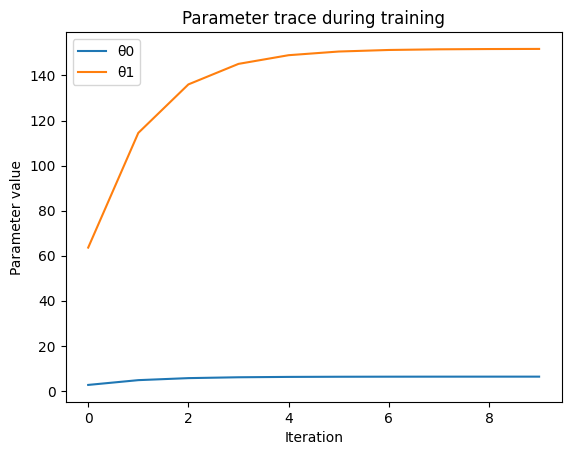

In [ ]:
import matplotlib.pyplot as plt

plt.plot(theta0_hist, label="θ0")
plt.plot(theta1_hist, label="θ1")
plt.xlabel("Iteration")
plt.ylabel("Parameter value")
plt.title("Parameter trace during training")
plt.legend()
plt.show()
